In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
from citipy import citipy

In [4]:
# from API_practice ipynb file
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# 6.2.6 Get the City Weather Data
import requests
# weather api key
from config import weather_api_key 

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | chapais
Processing Record 3 of Set 1 | aktash
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | dunedin
Processing Record 8 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 1 | victoria
Processing Record 10 of Set 1 | morant bay
Processing Record 11 of Set 1 | cherskiy
Processing Record 12 of Set 1 | khatanga
Processing Record 13 of Set 1 | salalah
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | aykhal
Processing Record 16 of Set 1 | warqla
City not found. Skipping...
Processing Record 17 of Set 1 | tuatapere
Processing Record 18 of Set 1 | alihe
Processing Record 19 of Set 1 | los llanos de aridane
Processing Record 20 of Set 1 | gidam
Processing Record 21 of Set 1 | rikitea
P

Processing Record 37 of Set 4 | leningradskiy
Processing Record 38 of Set 4 | faanui
Processing Record 39 of Set 4 | angoche
Processing Record 40 of Set 4 | toliary
City not found. Skipping...
Processing Record 41 of Set 4 | morondava
Processing Record 42 of Set 4 | ponta do sol
Processing Record 43 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 44 of Set 4 | kodiak
Processing Record 45 of Set 4 | alofi
Processing Record 46 of Set 4 | kununurra
Processing Record 47 of Set 4 | pemba
Processing Record 48 of Set 4 | iqaluit
Processing Record 49 of Set 4 | olinda
Processing Record 50 of Set 4 | mastic beach
Processing Record 1 of Set 5 | gold coast
Processing Record 2 of Set 5 | cayenne
Processing Record 3 of Set 5 | santiago del estero
Processing Record 4 of Set 5 | minador do negrao
Processing Record 5 of Set 5 | bosaso
Processing Record 6 of Set 5 | khormuj
City not found. Skipping...
Processing Record 7 of Set 5 | merrill
Processing Record 8 of Set 5 | abu samrah
P

Processing Record 25 of Set 8 | tautira
Processing Record 26 of Set 8 | freeport
Processing Record 27 of Set 8 | borova
Processing Record 28 of Set 8 | mataram
Processing Record 29 of Set 8 | eden
Processing Record 30 of Set 8 | samarai
Processing Record 31 of Set 8 | navalmoral de la mata
Processing Record 32 of Set 8 | sinnamary
Processing Record 33 of Set 8 | karratha
Processing Record 34 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 35 of Set 8 | neyshabur
Processing Record 36 of Set 8 | namibe
Processing Record 37 of Set 8 | xingyi
Processing Record 38 of Set 8 | teguise
Processing Record 39 of Set 8 | klaksvik
Processing Record 40 of Set 8 | luanshya
Processing Record 41 of Set 8 | goderich
Processing Record 42 of Set 8 | ixtapa
Processing Record 43 of Set 8 | bolshiye uki
City not found. Skipping...
Processing Record 44 of Set 8 | rohri
Processing Record 45 of Set 8 | rafaela
Processing Record 46 of Set 8 | paamiut
Processing Record 47 of Set 8 | hajdunan

Processing Record 16 of Set 12 | hlobyne
Processing Record 17 of Set 12 | roald
Processing Record 18 of Set 12 | kirakira
Processing Record 19 of Set 12 | byron bay
Processing Record 20 of Set 12 | akdepe
Processing Record 21 of Set 12 | rozsypne
Processing Record 22 of Set 12 | baykit
Processing Record 23 of Set 12 | adrar
Processing Record 24 of Set 12 | faya
Processing Record 25 of Set 12 | inhambane
Processing Record 26 of Set 12 | conceicao do araguaia
Processing Record 27 of Set 12 | porto belo
Processing Record 28 of Set 12 | iracoubo
Processing Record 29 of Set 12 | miyako
Processing Record 30 of Set 12 | vigeland
Processing Record 31 of Set 12 | suffolk
Processing Record 32 of Set 12 | kuruman
Processing Record 33 of Set 12 | raudeberg
Processing Record 34 of Set 12 | luganville
Processing Record 35 of Set 12 | homer
Processing Record 36 of Set 12 | mocambique
City not found. Skipping...
Processing Record 37 of Set 12 | galbshtadt
Processing Record 38 of Set 12 | blackwater
Pr

In [10]:
len(city_data)

567

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,76.75,76,68,10.02,PF,2022-11-20 10:49:48
1,Chapais,49.7834,-74.8492,20.98,95,100,5.37,CA,2022-11-20 10:49:48
2,Aktash,50.3000,87.7333,11.73,94,100,3.47,RU,2022-11-20 10:49:49
3,Busselton,-33.6500,115.3333,59.94,64,0,16.53,AU,2022-11-20 10:49:49
4,Jamestown,42.0970,-79.2353,22.71,77,100,16.11,US,2022-11-20 10:46:12
5,Dunedin,-45.8742,170.5036,55.80,91,76,1.01,NZ,2022-11-20 10:45:41
6,Victoria,22.2855,114.1577,79.18,79,22,13.00,HK,2022-11-20 10:45:50
7,Morant Bay,17.8815,-76.4093,78.42,84,70,9.01,JM,2022-11-20 10:49:50
8,Cherskiy,68.7500,161.3000,-13.20,98,100,8.05,RU,2022-11-20 10:49:51
9,Khatanga,71.9667,102.5000,-32.53,100,93,3.47,RU,2022-11-20 10:49:51


In [12]:
# Change column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2022-11-20 10:49:48,-9.8000,-139.0333,76.75,76,68,10.02
1,Chapais,CA,2022-11-20 10:49:48,49.7834,-74.8492,20.98,95,100,5.37
2,Aktash,RU,2022-11-20 10:49:49,50.3000,87.7333,11.73,94,100,3.47
3,Busselton,AU,2022-11-20 10:49:49,-33.6500,115.3333,59.94,64,0,16.53
4,Jamestown,US,2022-11-20 10:46:12,42.0970,-79.2353,22.71,77,100,16.11
...,...,...,...,...,...,...,...,...,...
562,Bull Savanna,JM,2022-11-20 11:05:47,17.8868,-77.5902,72.57,82,100,7.45
563,Galesburg,US,2022-11-20 11:05:48,40.9478,-90.3712,15.89,82,0,4.61
564,Touros,BR,2022-11-20 11:05:48,-5.1989,-35.4608,83.35,63,73,14.05
565,Zheleznodorozhnyy,RU,2022-11-20 11:05:48,55.7503,38.0042,28.92,86,97,3.13


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# 6.3.1 Plot Latitude vs Temperature
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1668942349.5256758

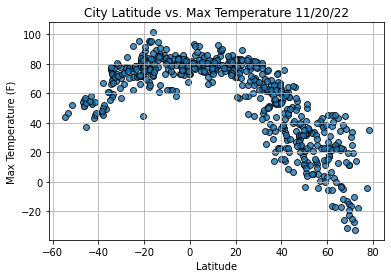

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

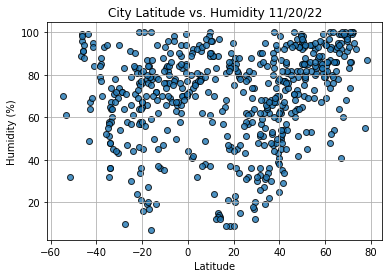

In [17]:
# 6.3.2 Plot Latitude vs Humidity
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

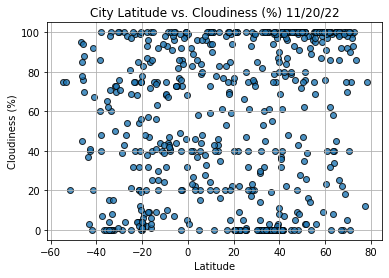

In [18]:
# 6.3.3 Plot Latitude vs Cloudiness
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

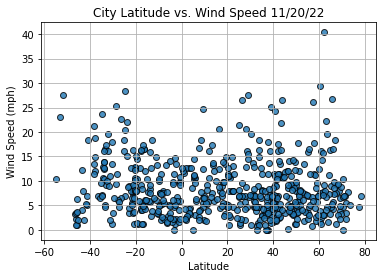

In [19]:
# 6.3.4 Plot Latitude vs Wind Speed
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# 6.4.2 Find the Correlation between Latitude & Maximum Temperature
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]

In [22]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
562     True
563     True
564    False
565     True
566    False
Name: Lat, Length: 567, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Chapais,CA,2022-11-20 10:49:48,49.7834,-74.8492,20.98,95,100,5.37
2,Aktash,RU,2022-11-20 10:49:49,50.3000,87.7333,11.73,94,100,3.47
4,Jamestown,US,2022-11-20 10:46:12,42.0970,-79.2353,22.71,77,100,16.11
6,Victoria,HK,2022-11-20 10:45:50,22.2855,114.1577,79.18,79,22,13.00
7,Morant Bay,JM,2022-11-20 10:49:50,17.8815,-76.4093,78.42,84,70,9.01
...,...,...,...,...,...,...,...,...,...
560,Gwadar,PK,2022-11-20 11:05:46,25.1216,62.3254,82.44,43,0,7.00
561,Saint-Francois,FR,2022-11-20 11:05:47,46.4154,3.9054,48.67,71,0,9.22
562,Bull Savanna,JM,2022-11-20 11:05:47,17.8868,-77.5902,72.57,82,100,7.45
563,Galesburg,US,2022-11-20 11:05:48,40.9478,-90.3712,15.89,82,0,4.61


In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Chapais,CA,2022-11-20 10:49:48,49.7834,-74.8492,20.98,95,100,5.37
2,Aktash,RU,2022-11-20 10:49:49,50.3000,87.7333,11.73,94,100,3.47
4,Jamestown,US,2022-11-20 10:46:12,42.0970,-79.2353,22.71,77,100,16.11
6,Victoria,HK,2022-11-20 10:45:50,22.2855,114.1577,79.18,79,22,13.00
7,Morant Bay,JM,2022-11-20 10:49:50,17.8815,-76.4093,78.42,84,70,9.01


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

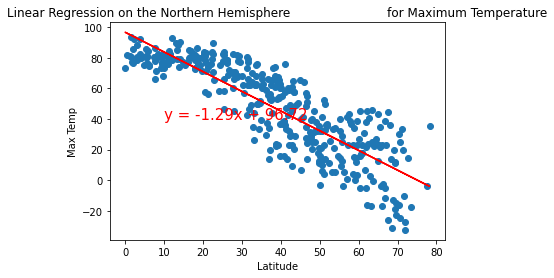

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

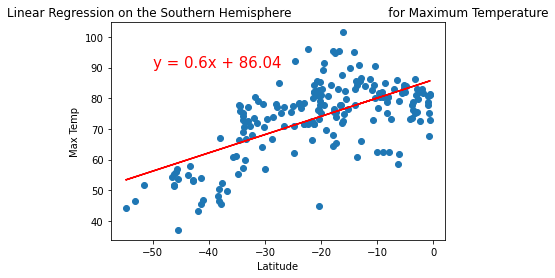

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

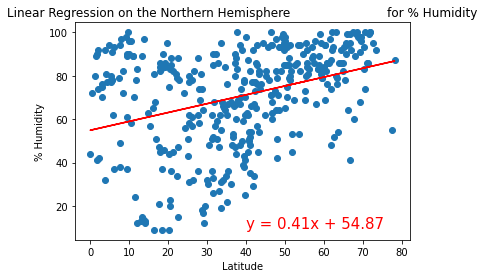

In [28]:
# 6.4.3 Correlation between latitude & Percent Humidity
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

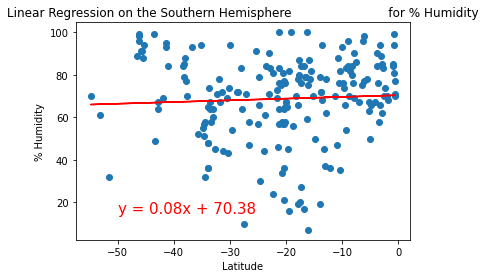

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

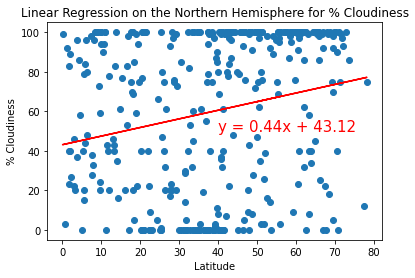

In [37]:
# 6.4.4 Correlation between Latitude & Percent Cloudiness
# Linear regression on the Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness', (40,50))

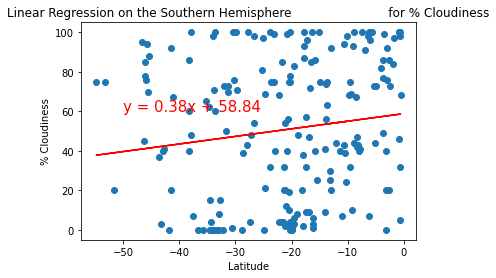

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

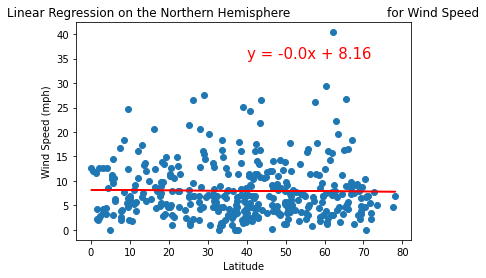

In [40]:
# 6.4.5 Correlation Between Latitude and Wind Speed
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(40,35))

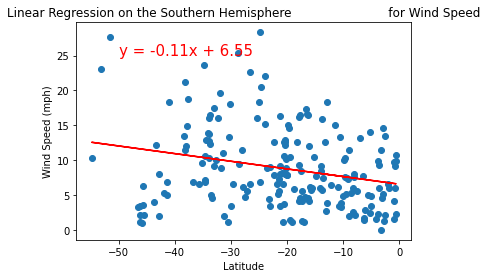

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(-50,25))